In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d elikplim/car-evaluation-data-set

In [37]:
import pandas as pd
import numpy as np

df = pd.read_csv('car_evaluation.csv')
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [38]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   vhigh    1727 non-null   str  
 1   vhigh.1  1727 non-null   str  
 2   2        1727 non-null   str  
 3   2.1      1727 non-null   str  
 4   small    1727 non-null   str  
 5   low      1727 non-null   str  
 6   unacc    1727 non-null   str  
dtypes: str(7)
memory usage: 94.6 KB


In [39]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [40]:
names = ['price', 'maintnace cost', 'doors', 'persons', 'lug_boot', 'safety', 'decision']
df = pd.read_csv('car_evaluation.csv', names=names)
df

,price,maintnace cost,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [41]:
print(df.isnull().sum())

price             0
maintnace cost    0
doors             0
persons           0
lug_boot          0
safety            0
decision          0
dtype: int64


In [42]:
print(df.duplicated().sum())

0


In [43]:
# 'low', 'med', 'high', 'vhigh' # price
# 'low', 'med', 'high', 'vhigh' # maintnace cost
# '2', '3', '4', '5more'        # doors
# '2', '4', 'more'              # persons
# 'small', 'med', 'big'         # lug_boot
# 'low', 'med', 'high'          # safety

In [44]:
from sklearn.preprocessing import LabelEncoder

doors_map = {'2': 2, '3': 3, '4': 4, '5more': 5}
persons_map = {'2': 2, '4': 4, 'more': 6}

df['doors'] = df['doors'].map(doors_map)
df['persons'] = df['persons'].map(persons_map)

le = LabelEncoder()
categorical_cols = ['price', 'maintnace cost', 'lug_boot', 'safety', 'decision']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [45]:
df

,price,maintnace cost,doors,persons,lug_boot,safety,decision
0,3,3,2,2,2,1,2
1,3,3,2,2,2,2,2
2,3,3,2,2,2,0,2
3,3,3,2,2,1,1,2
4,3,3,2,2,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,5,6,1,2,1
1724,1,1,5,6,1,0,3
1725,1,1,5,6,0,1,2
1726,1,1,5,6,0,2,1


In [46]:
X = df.drop(['decision'], axis=1)
y = df['decision']


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [48]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [49]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8371

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.92      0.72       129
           1       0.00      0.00      0.00        20
           2       0.97      0.90      0.94       397
           3       0.00      0.00      0.00        25

    accuracy                           0.84       571
   macro avg       0.39      0.46      0.41       571
weighted avg       0.81      0.84      0.81       571



d:\acu\nti_ml4da\sessions\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\acu\nti_ml4da\sessions\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\acu\nti_ml4da\sessions\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


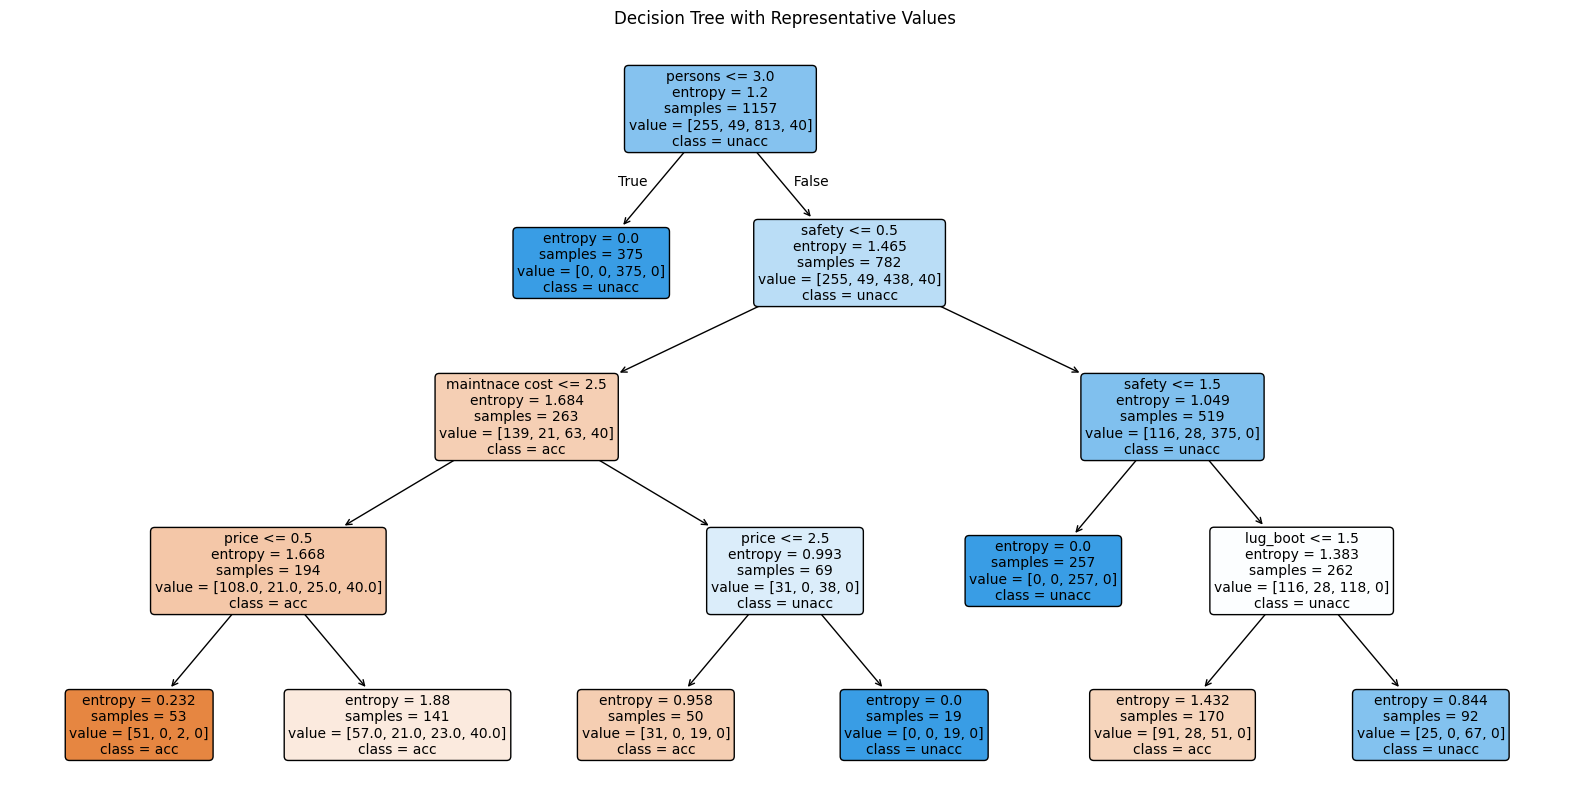

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=list(le.classes_), 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree with Representative Values")
plt.savefig('car_decision_tree.png')
plt.show()

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[255   0   0   0]
 [  0  49   0   0]
 [  0   0 813   0]
 [  0   0   0  40]]

Test Result:
Accuracy Score: 95.97%
_______________________________________________
Confusion Matrix: 
 [[115   7   6   1]
 [  2  17   0   1]
 [  3   0 394   0]
 [  3   0   0  22]]



In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [100, 500, 1000, 1500]
max_features = ['sqrt', 'log2']
max_depth = [2, 3, 5, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(
    rf_clf,
    params_grid,
    scoring="accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1
)

rf_cv.fit(X, y)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")
rf_clf_best = RandomForestClassifier(**best_params)
rf_clf_best.fit(X_train, y_train)

print_score(rf_clf_best, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf_best, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


d:\acu\nti_ml4da\sessions\venv\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[255   0   0   0]
 [  0  49   0   0]
 [  0   0 813   0]
 [  0   0   0  40]]

Test Result:
Accuracy Score: 96.67%
_______________________________________________
Confusion Matrix: 
 [[116   8   4   1]
 [  0  20   0   0]
 [  3   0 394   0]
 [  3   0   0  22]]

